In [10]:
import wave
import numpy as np
import pylab
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# глобальные переменные
delta = 50
reduceCount = 5

types = {
    1: np.int8,
    2: np.int16,
    4: np.int32
}

In [11]:
# Запись массива сэмплов в файл
def printSamples(samples):
    output = open("samples.txt", "w")
    for sample in samples:
        string ='{:.2f}'.format(sample)
        output.write(string + '\n')
    output.close()

In [12]:
# Свертка (сжимает массив сэмплов, усредняя значения)
def cutSamples(samples):
    i = 0
    values = []
    while i + delta < samples.size:
        samplesSlice = samples[i:i+delta]
        samplesSlice = list(map(lambda x: abs(x), samplesSlice))
        samplesSlice.sort()
        samplesSlice = samplesSlice[reduceCount : delta - reduceCount]
        value = sum(samplesSlice) / len(samplesSlice)
        values.append(value)
        i = i + delta
    
    return values

In [13]:
# Обрезка файла    
def cutAudio(fileName, source, target, outputName): 
    inputFile = wave.open(fileName, mode="r")
    (channels, sWidth, rate, framesCount, comptype, compname) = inputFile.getparams()
    
    content = inputFile.readframes(framesCount)
    samples = np.fromstring(content, dtype=types[sWidth])
    samples = samples[round(source*rate):round(target*rate)]

    outputFile = wave.open(outputName, mode="w")
    outputFile.setparams((channels, sWidth, rate, samples.size, comptype, compname))
    outputFile.writeframes(samples)
    outputFile.close()
    
    return cutSamples(samples)

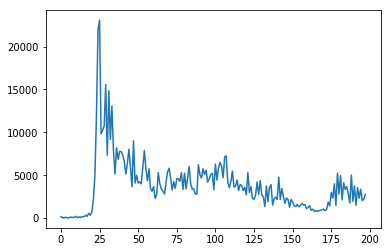

In [14]:
values = cutAudio("40min.wav", 5.22, 5.67, "5,1-5,8.wav")

pylab.plot(values)
pylab.show()

In [18]:
wav = wave.open("111.wav", mode="r")
(nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()
print(nchannels, sampwidth, framerate, nframes, comptype, compname)

duration = nframes / framerate
content = wav.readframes(nframes)
samples = np.fromstring(content, dtype=types[sampwidth])
values = cutSamples(samples)
printSamples(values)

# нахождение пиков в записи
frameOnCut = []
i = 20
prevResults = i
while i < len(values):
    if values[i] > 10000:
        slice = values[i-prevResults:i]
        minPrevValue = min(slice)
        if values[i] / minPrevValue > 20:
            frameOnCut.append(i)
            i += 150
            continue
    i += 1

# переводим величины массива frameOnCut из порядкового номера фрейма в секунды
frameOnCut = list(map(lambda x: x*delta, frameOnCut))
frameOnCut = list(map(lambda x: x/framerate, frameOnCut))
print(len(frameOnCut))
print(frameOnCut)

# вырезаем аудио-файл с каждым пиком и строим диаграмму
for framePik in frameOnCut:
    endPath = '{:.2f}'.format(framePik)
    path = "results/sounds/result_" + endPath + ".wav"
    imagePath = "results/graphics/result_" + endPath + ".png"
    path = path.replace(".", ",", 1)
    imagePath = imagePath.replace(".", ",", 1)
    values = cutAudio("111.wav", framePik-0.05, framePik+0.4, path)
    plt.plot(values)
    plt.savefig(imagePath)
    plt.close()

1 2 22050 52956160 NONE not compressed
164
[5.272108843537415, 5.916099773242631, 8.235827664399093, 10.811791383219955, 15.793650793650794, 108.5578231292517, 110.01587301587301, 126.30839002267574, 303.2018140589569, 324.718820861678, 328.84353741496597, 329.42857142857144, 332.6621315192744, 349.07936507936506, 583.0702947845805, 584.6938775510204, 585.2879818594105, 586.2743764172336, 592.5147392290249, 596.031746031746, 626.3877551020408, 626.780045351474, 633.156462585034, 642.0770975056689, 656.7732426303855, 657.1655328798186, 690.9727891156463, 693.2290249433106, 696.9773242630386, 711.6054421768707, 713.5827664399093, 717.8321995464853, 736.9251700680272, 786.1814058956916, 864.7891156462586, 865.8843537414966, 876.3877551020408, 886.780045351474, 888.3537414965987, 917.9818594104308, 938.3945578231293, 1005.2063492063492, 1101.875283446712, 1103.1609977324263, 1112.015873015873, 1183.095238095238, 1201.8639455782313, 1352.1904761904761, 1353.9410430839002, 1354.8253968253969